In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data_folder = './wiki_pageviews_covid/data/'
file_name = 'Global_Mobility_Report.csv'
df = pd.read_csv(data_folder + file_name)

C:\Users\digen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111407,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-19,NaN,NaN,NaN,NaN,-9.0,NaN
2111408,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-20,NaN,NaN,NaN,NaN,-5.0,NaN
2111409,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-21,NaN,NaN,NaN,NaN,-5.0,NaN
2111410,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-24,NaN,NaN,NaN,NaN,-4.0,NaN


In [4]:
df.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [5]:
df['country_region'].unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
Europe = ['Austria','Bosnia and Herzegovina',  'Belgium', 'Bulgaria', 'Belarus',  'Switzerland',  'Czechia', 'Germany',
          'Denmark','Estonia',  'Spain','Finland', 'France',  'United Kingdom', 'Georgia', 'Greece',  'Croatia',
          'Hungary',  'Ireland','Israel',  'Italy',  'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia',  'Moldova', 
           'North Macedonia',   'Malta', 'Netherlands', 'Norway', 'Poland',  'Portugal', 'Romania', 'Serbia', 
          'Sweden',  'Slovenia', 'Slovakia',  'Turkey', 'Ukraine']

Asia = [ 'Afghanistan', 'Angola', 'Bangladesh', 'Bahrain', 'Hong Kong','Indonesia','India', 'Iraq','Jordan', 'Japan',
        'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait','Kazakhstan', 'Laos','Sri Lanka','Myanmar (Burma)', 'Mongolia',
         'Malaysia', 'Nepal','Oman', 'Pakistan','Qatar','Russia','Saudi Arabia','Singapore','Thailand','Tajikistan', 
         'Taiwan','Vietnam', 'Yemen']

America = ['United Arab Emirates','Antigua and Barbuda','Argentina', 'Aruba','Barbados', 'Bolivia','Brazil', 'The Bahamas', 'Belize',
           'Canada', 'Chile','Colombia','Costa Rica','Dominican Republic', 'Ecuador','Guatemala','Honduras','Haiti','Jamaica',
           'Mauritius', 'Mexico','Nicaragua','Peru', 'Philippines','Puerto Rico','Paraguay','El Salvador','Trinidad and Tobago'
           'United States', 'Uruguay','Venezuela', 'Panama']

Africa = ['Burkina Faso', 'Benin', 'Botswana',  "Côte d'Ivoire", 'Cameroon', 'Cape Verde', 'Egypt','Gabon', 'Ghana', 
          'Guinea-Bissau','Kenya','Lebanon','Libya', 'Morocco','Mali','Mozambique', 'Namibia','Niger', 'Nigeria', 
           'Papua New Guinea','Rwanda','Senegal',  'Togo', 'Tanzania','Uganda','South Africa', 'Zambia','Zimbabwe','Réunion']

Oceania = ['Australia', 'Fiji', 'New Zealand',]

In [8]:
#creating a dataset for each continent

df_europe = df.loc[df['country_region'].isin(Europe)]
df_asia = df.loc[df['country_region'].isin(Asia)]
df_africa = df.loc[df['country_region'].isin(Africa)]
df_america = df.loc[df['country_region'].isin(America)]
df_oceania = df.loc[df['country_region'].isin(Oceania)]

In [9]:
df_europe

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
83020,AT,Austria,NaN,NaN,NaN,NaN,NaN,2020-02-15,9.0,1.0,42.0,13.0,0.0,-2.0
83021,AT,Austria,NaN,NaN,NaN,NaN,NaN,2020-02-16,15.0,21.0,42.0,12.0,1.0,-2.0
83022,AT,Austria,NaN,NaN,NaN,NaN,NaN,2020-02-17,9.0,5.0,35.0,3.0,-4.0,0.0
83023,AT,Austria,NaN,NaN,NaN,NaN,NaN,2020-02-18,8.0,5.0,40.0,2.0,-4.0,0.0
83024,AT,Austria,NaN,NaN,NaN,NaN,NaN,2020-02-19,4.0,2.0,10.0,-1.0,-5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573762,UA,Ukraine,NaN,NaN,Kiev Metropolitan Area,NaN,NaN,2020-08-21,-9.0,3.0,57.0,-14.0,-35.0,-1.0
1573763,UA,Ukraine,NaN,NaN,Kiev Metropolitan Area,NaN,NaN,2020-08-22,-21.0,-8.0,57.0,-15.0,-13.0,-9.0
1573764,UA,Ukraine,NaN,NaN,Kiev Metropolitan Area,NaN,NaN,2020-08-23,-18.0,-8.0,71.0,-14.0,-4.0,-9.0
1573765,UA,Ukraine,NaN,NaN,Kiev Metropolitan Area,NaN,NaN,2020-08-24,-9.0,-5.0,97.0,-33.0,-74.0,7.0


In [10]:
df_europe['retail_and_recreation_percent_change_from_baseline'].describe()

count    472661.000000
mean        -22.838923
std          35.279180
min        -100.000000
25%         -50.000000
50%         -17.000000
75%           1.000000
max         545.000000
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64

In [11]:
#select only the total, not the single regions of a country

df_europe_new = df_europe.loc[(df['sub_region_1'].isna())&(df['sub_region_2'].isna())&(df['metro_area'].isna())]
df_asia_new = df_asia.loc[(df['sub_region_1'].isna())&(df['sub_region_2'].isna())&(df['metro_area'].isna())]
df_america_new = df_america.loc[(df['sub_region_1'].isna())&(df['sub_region_2'].isna())&(df['metro_area'].isna())]
df_oceania_new = df_oceania.loc[(df['sub_region_1'].isna())&(df['sub_region_2'].isna())&(df['metro_area'].isna())]
df_africa_new = df_africa.loc[(df['sub_region_1'].isna())&(df['sub_region_2'].isna())&(df['metro_area'].isna())]

MAYBE IS BETTER TO DROP COUNTRIES WITH A LOT NAN BEFORE AGGREGATION!!

<ipython-input-13-73ec44a73db1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europe_new['to remove'+cat]=np.zeros(df_europe_new.shape[0])
C:\Users\digen\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-13-73ec44a73db1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

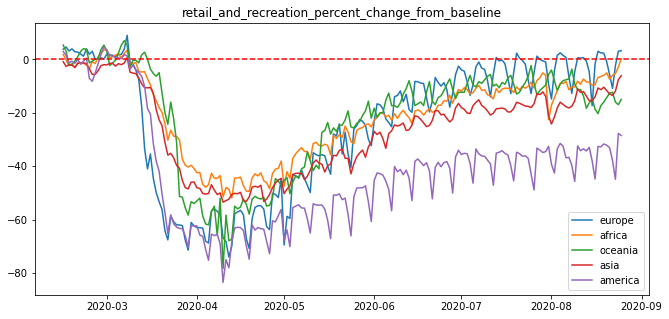

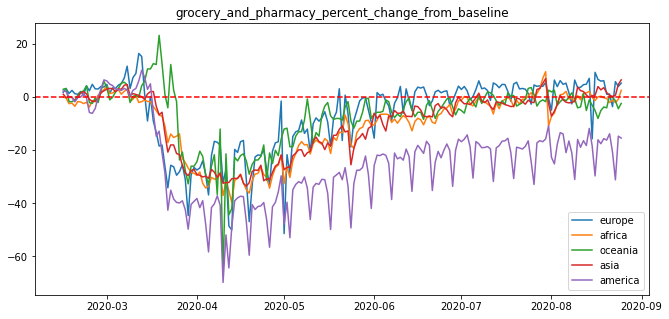

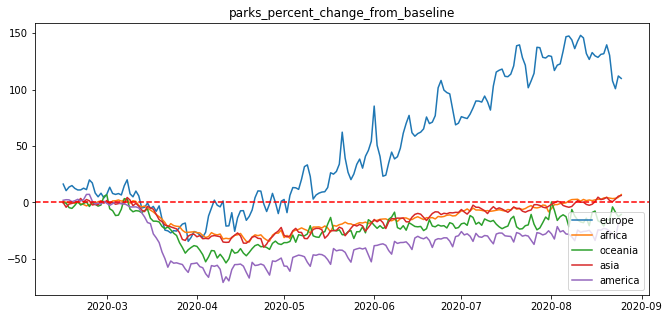

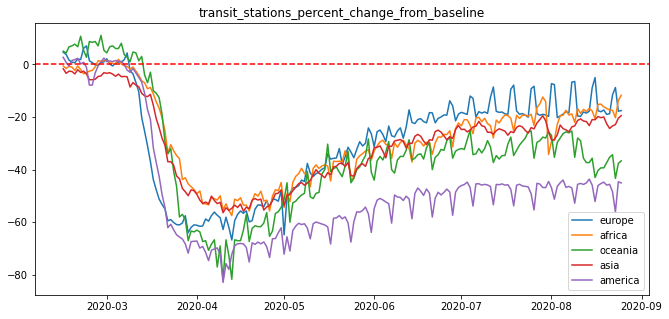

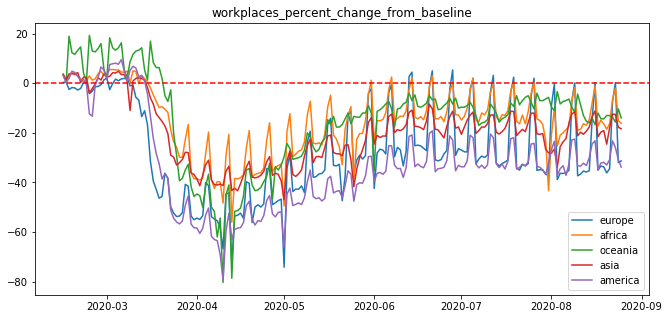

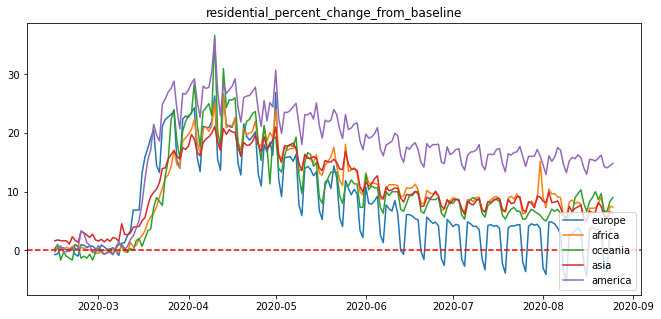

In [13]:
#AGGREGATE ANALYSIS OF CONTINENTS

for cat in df.columns[-6:]:
    #for each continent I am removing countries with >treshold  nan (missing more than 1 month of observations) in category=cat 
    treshold = 30
    
    df_europe_new['to remove '+cat]=np.zeros(df_europe_new.shape[0])
    for country in df_europe_new['country_region'].unique():
        nan = np.sum(df_europe_new.loc[df_europe_new['country_region']==country, cat].isna())
        if nan > treshold:
            df_europe_new.loc[df_europe_new['country_region']==country,'to remove '+cat] = 1
    cat_1eu = df_europe_new.loc[df_europe_new['to remove '+cat] == 0]
           
    df_asia_new['to remove '+cat]=np.zeros(df_asia_new.shape[0])
    for country in df_asia_new['country_region'].unique():
        nan = np.sum(df_asia_new.loc[df_asia_new['country_region']==country, cat].isna())
        if nan > treshold:
            df_asia_new.loc[df_asia_new['country_region']==country,'to remove '+cat] = 1
    cat_1as = df_asia_new.loc[df_asia_new['to remove '+cat] == 0]
           
    df_america_new['to remove '+cat]=np.zeros(df_america_new.shape[0])
    for country in df_america_new['country_region'].unique():
        nan = np.sum(df_america_new.loc[df_america_new['country_region']==country, cat].isna())
        if nan > treshold:
            df_america_new.loc[df_america_new['country_region']==country,'to remove '+cat] = 1
    cat_1am = df_america_new.loc[df_america_new['to remove '+cat] == 0]
           
    df_africa_new['to remove '+cat]=np.zeros(df_africa_new.shape[0])
    for country in df_africa_new['country_region'].unique():
        nan = np.sum(df_africa_new.loc[df_africa_new['country_region']==country, cat].isna())
        if nan > treshold:
            df_africa_new.loc[df_africa_new['country_region']==country,'to remove '+cat] = 1
    cat_1af = df_africa_new.loc[df_africa_new['to remove '+cat] == 0]
           
    df_oceania_new['to remove '+cat]=np.zeros(df_oceania_new.shape[0])
    for country in df_oceania_new['country_region'].unique():
        nan = np.sum(df_oceania_new.loc[df_oceania_new['country_region']==country, cat].isna())
        if nan > treshold:
            df_oceania_new.loc[df_oceania_new['country_region']==country,'to remove '+cat] = 1
    cat_1oc = df_oceania_new.loc[df_oceania_new['to remove '+cat] == 0]
           
            
    cat_1eu = cat_1eu[['date', cat]].fillna(method='ffill')
    cat_1af = cat_1af[['date', cat]].fillna(method='ffill')
    cat_1oc = cat_1oc[['date', cat]].fillna(method='ffill')
    cat_1as = cat_1as[['date', cat]].fillna(method='ffill')
    cat_1am = cat_1am[['date', cat]].fillna(method='ffill')
    
    means_eu = cat_1eu.groupby('date').apply(lambda x: x.mean())
    means_am = cat_1am.groupby('date').apply(lambda x: x.mean())
    means_af = cat_1af.groupby('date').apply(lambda x: x.mean())
    means_oc = cat_1oc.groupby('date').apply(lambda x: x.mean())
    means_as = cat_1as.groupby('date').apply(lambda x: x.mean())
    
    fig = plt.figure(figsize = (11,5))

    plt.plot(means_eu, label = 'europe')
    plt.plot(means_af, label = 'africa')
    plt.plot(means_oc, label = 'oceania')
    plt.plot(means_as, label = 'asia')
    plt.plot(means_am, label = 'america')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.legend(loc = 'lower right', fontsize = 10)
    plt.title(cat)

In [19]:
np.sum(df_europe_new['to removeretail_and_recreation_percent_change_from_baseline'])

193.0

In [14]:
data_folder = './wiki_pageviews_covid/data/'
file_name = 'interventions.csv'
interv = pd.read_csv(data_folder + file_name)

In [15]:
interv.head()

,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
0,fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02
1,da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10
3,it,2020-01-31,2020-02-22,2020-03-05,2020-03-09,2020-03-11,2020-03-11,2020-06-26
4,nl,2020-02-27,2020-03-06,2020-03-11,2020-03-24,NaN,2020-03-16,2020-05-29
